In [8]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import sys

import utils
from spider_boost import spider_boost

In [2]:
train_dataset = dsets.MNIST(root='~/.pytorch/MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
train_dataset = utils.DatasetWrapper(train_dataset)

In [3]:
class CustomModel(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(CustomModel, self).__init__()
        self.conv1 = torch.nn.Linear(input_dim, 28)
        self.conv2 = torch.nn.Linear(28, output_dim)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        outputs = torch.sigmoid(self.conv2(x))
        return outputs
    
gd_model = CustomModel(784, 10)
sb_model = copy.deepcopy(gd_model)

if torch.cuda.is_available():
    gd_model = gd_model.cuda()
    sb_model = sb_model.cuda()

In [4]:
loss = torch.nn.CrossEntropyLoss().cuda()
regularizer = utils.regularizer

In [5]:
batch_size = 2048
learning_rate = 0.001
n_epochs = 100

In [6]:
gd_total_loss = utils.gradient_descent(train_dataset, batch_size, gd_model, loss, regularizer, learning_rate, n_epochs)
sb_total_loss = spider_boost(train_dataset, batch_size, sb_model, loss, regularizer, learning_rate, n_epochs)

epoch: 0
epoch: 20
epoch: 40
epoch: 60
epoch: 80
epoch: 0
epoch: 20
epoch: 40
epoch: 60
epoch: 80


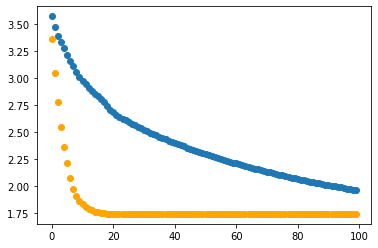

In [9]:
plt.scatter(np.arange(n_epochs), gd_total_loss)
plt.scatter(np.arange(n_epochs), sb_total_loss, color='orange')
plt.show()